In [211]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt   
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [212]:
df = pd.read_csv('Telecom_Industry.csv')

In [213]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
Churn              3333 non-null int64
AccountWeeks       3333 non-null int64
ContractRenewal    3333 non-null int64
DataPlan           3333 non-null int64
DataUsage          3333 non-null float64
CustServCalls      3333 non-null int64
DayMins            3333 non-null float64
DayCalls           3333 non-null int64
MonthlyCharge      3333 non-null float64
OverageFee         3333 non-null float64
RoamMins           3331 non-null float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [215]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

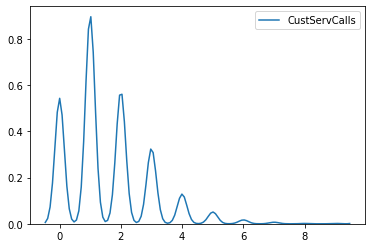

In [216]:
sns.kdeplot(df['CustServCalls'])

In [217]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [218]:
#Churn, ContractRenewal, DataPlan, DataUsage, CustServCalls are objects

In [219]:
df[['Churn', 'ContractRenewal', 'DataPlan', 'CustServCalls']] = df[['Churn', 'ContractRenewal', 'DataPlan', 'CustServCalls']].astype(object)

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
Churn              3333 non-null object
AccountWeeks       3333 non-null int64
ContractRenewal    3333 non-null object
DataPlan           3333 non-null object
DataUsage          3333 non-null float64
CustServCalls      3333 non-null object
DayMins            3333 non-null float64
DayCalls           3333 non-null int64
MonthlyCharge      3333 non-null float64
OverageFee         3333 non-null float64
RoamMins           3331 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 286.6+ KB


In [221]:
df.describe() ##Quantitative Columns summary

,AccountWeeks,DataUsage,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3331.000000
mean,101.064806,0.816475,179.775098,100.435644,56.305161,10.051488,10.237346
std,39.822106,1.272668,54.467389,20.069084,16.426032,2.535712,2.792675
min,1.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,101.000000,0.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,127.000000,1.780000,216.400000,114.000000,66.200000,11.770000,12.100000
max,243.000000,5.400000,350.800000,165.000000,111.300000,18.190000,20.000000


In [222]:
df.describe(include=object) #Qualitative Columns summary

,Churn,ContractRenewal,DataPlan,CustServCalls
count,3333,3333,3333,3333
unique,2,2,2,10
top,0,1,0,1
freq,2850,3010,2411,1181


In [223]:
df.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           2
dtype: int64

In [224]:
#2 NaN values spotted in  RoamMins

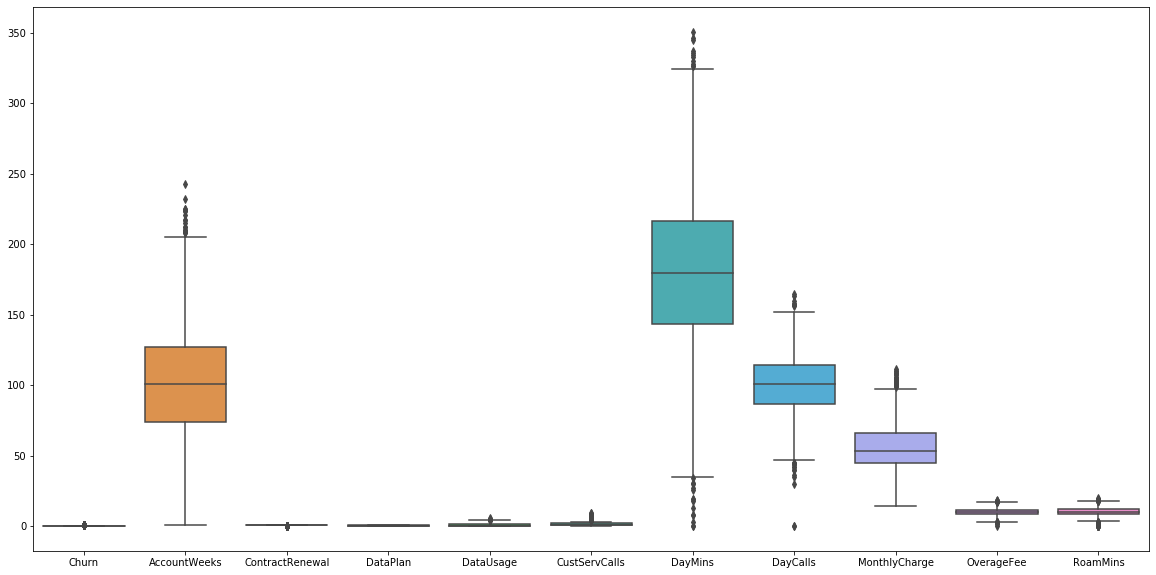

In [225]:
plt.figure(figsize=(20,10))  ##Checking outliers
sns.boxplot(data=df)

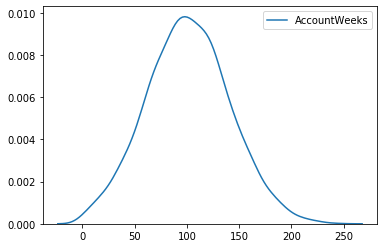

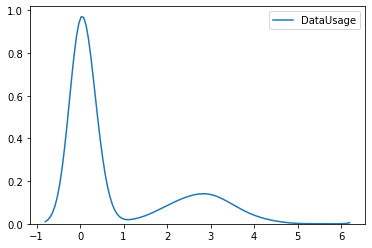

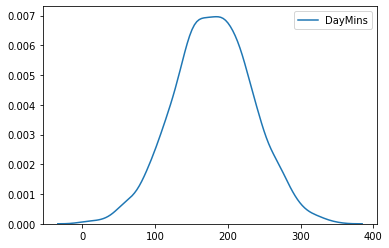

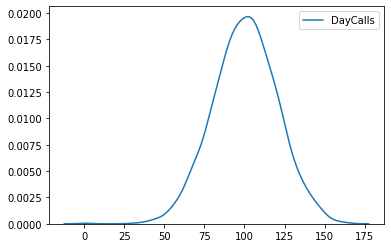

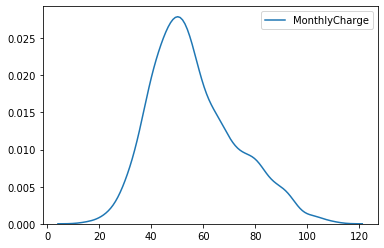

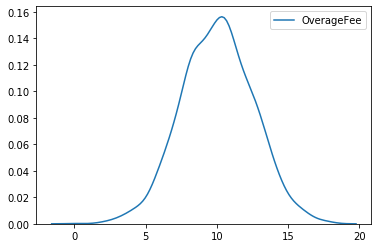

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


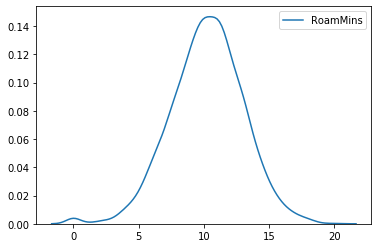

In [226]:
#Distribution plots for quantitative variables
for i in list(df.dtypes[df.dtypes!=object].index):
    sns.kdeplot(df[i])
    plt.show()

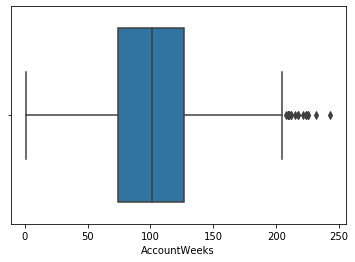

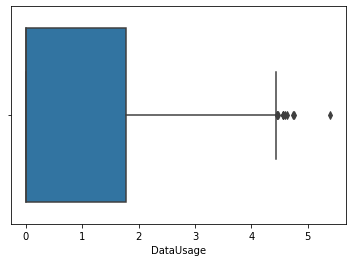

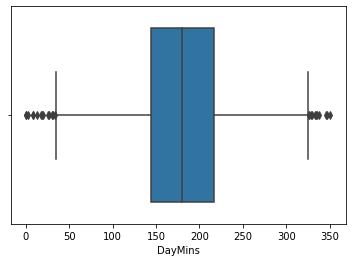

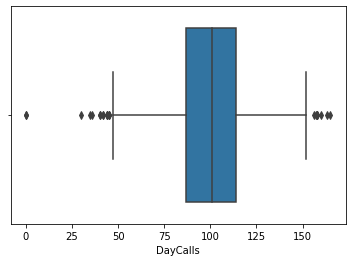

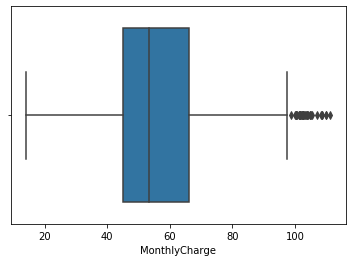

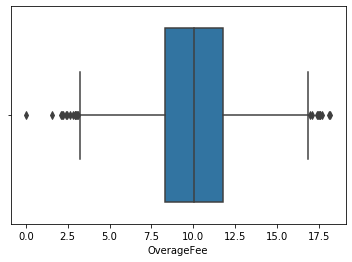

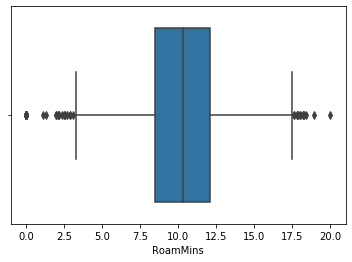

In [227]:
##Outlier check for quantitative variables
for i in list(df.dtypes[df.dtypes!=object].index):
    sns.boxplot(df[i])
    plt.show()

In [228]:
##There aren't much extreme outliers, so for the time being, we can work with them, since we don't want to lose out on data

In [229]:
##We saw that there were NaNs in RoamMins, so we can impute them

In [230]:
df['RoamMins'].head()

0    10.0
1    13.7
2    12.2
3     6.6
4    10.1
Name: RoamMins, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


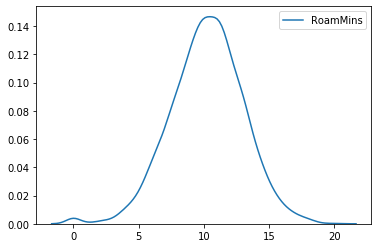

In [231]:
sns.kdeplot(df['RoamMins'])

In [232]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [233]:
##It's better to impute the NAN RoamMins with median values

In [234]:
df['RoamMins'].fillna(df['RoamMins'].median(),inplace=True)

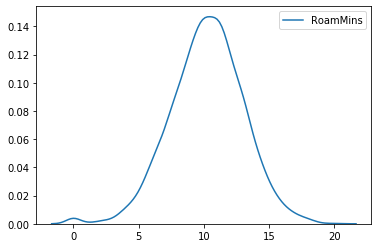

In [235]:
##Checking distribution again:
sns.kdeplot(df['RoamMins'])

In [236]:
df['RoamMins'].isna().sum()

0

In [237]:
##Distribution hasn't changed much, so that is a good sign

In [238]:
##Let's check correlation plot: to see if multi-collinearity exists

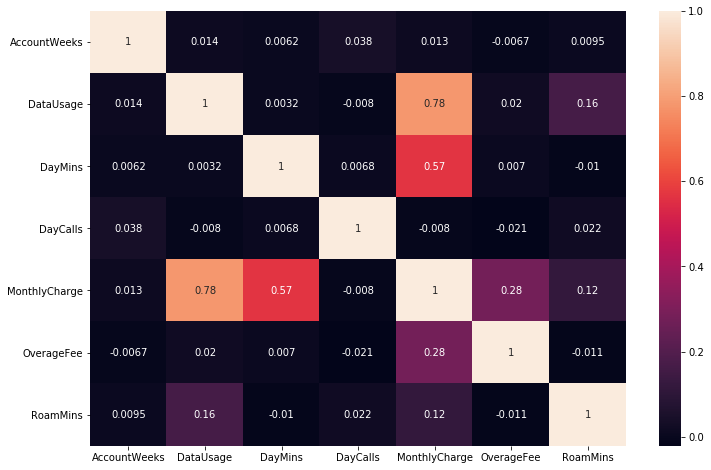

In [239]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5
plt.ylim(b, t) 
plt.show()

In [240]:
##Monthly charge and data usage have high correlation, but for now we won't drop any

In [241]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


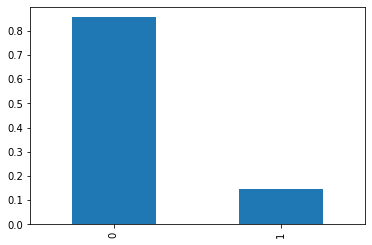

In [242]:
df['Churn'].value_counts(normalize=True).plot.bar()

In [243]:
df1 = df.astype(float)
y = df1['Churn']
X = df1.drop(columns='Churn')
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# one sample t test

### 2) t test

### Very rarely we know the variance of the population. 

A common strategy to assess hypothesis is to conduct a t test. A t test can tell whether two groups have the same mean. 
A t test can be estimated for:
* 1) One sample t test
* 2) Two sample t test (including paired t test)

We assume that the samples are randomly selected, independent and come from a normally distributed population with unknown but equal variances.

### One sample t test

In [244]:
from scipy.stats import ttest_1samp

In [245]:
#ttest_1samp(sample,pop_mean)

In [246]:
ttest_1samp(y_train,y.mean())

Ttest_1sampResult(statistic=0.11231159530653723, pvalue=0.910586014485638)

In [247]:
ttest_1samp(y_test,y.mean())

Ttest_1sampResult(statistic=-0.1728533279252816, pvalue=0.8628017316815977)

In [248]:
print('Mean is %2.1f Sd is %2.1f' % (y.mean(),np.std(y,ddof = 1)))

Mean is 0.1 Sd is 0.4


In [249]:
model1 = sm.Logit(y_train,X_train)
result1 = model1.fit()
result1.summary()

Optimization terminated successfully.
         Current function value: 0.330580
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2333
Model:                          Logit   Df Residuals:                     2322
Method:                           MLE   Df Model:                           10
Date:                Wed, 22 Jan 2020   Pseudo R-squ.:                  0.2039
Time:                        11:28:05   Log-Likelihood:                -771.24
converged:                       True   LL-Null:                       -968.75
Covariance Type:            nonrobust   LLR p-value:                 1.079e-78
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -5.3633      0.656     -8.179      0.000      -6.649      -4.078
AccountWeeks        0.0006      0.002      0.336      0.737      -0.003       0.004
ContractRenewal    -2.1130      0.172    -12.299      0.000      -2.450      -1.776
DataPlan           -0.8746      0.636     -1.375      0.169      -2.121       0.372
DataUsage          -0.6214      2.278     -0.273      0.785      -5.087       3.844
CustServCalls       0.4969      0.046     10.909      0.000       0.408       0.586
DayMins             0.0010      0.039      0.026      0.979      -0.075       0.077
DayCalls           -0.0002      0.003     -0.048      0.962      -0.007       0.006
MonthlyCharge       0.0619      0.227      0.273      0.785      -0.383       0.507
OverageFee          0.0271      0.387      0.070      0.944      -0.732       0.786
RoamMins            0.0995      0.027      3.753      0.000       0.048       0.152
===================================================================================
"""

In [250]:
##Let's check for multi-collinearity using VIF:

In [251]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame({'vif': vif}, index=X.columns)

,vif
const,93.414821
AccountWeeks,1.003791
ContractRenewal,1.007216
DataPlan,12.473196
DataUsage,1964.795810
CustServCalls,1.001945
DayMins,1031.490229
DayCalls,1.002933
MonthlyCharge,3243.299252
OverageFee,224.639670


In [252]:
##Dropping Monthly Charge:

In [45]:
X = X.drop(columns='MonthlyCharge')

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model1 = sm.Logit(y_train,X_train)
result1 = model1.fit()
result1.summary()

Optimization terminated successfully.
         Current function value: 0.330595
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2333
Model:                          Logit   Df Residuals:                     2323
Method:                           MLE   Df Model:                            9
Date:                Tue, 21 Jan 2020   Pseudo R-squ.:                  0.2038
Time:                        13:41:06   Log-Likelihood:                -771.28
converged:                       True   LL-Null:                       -968.75
Covariance Type:            nonrobust   LLR p-value:                 1.639e-79
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -5.3328      0.646     -8.256      0.000      -6.599      -4.067
AccountWeeks        0.0006      0.002      0.335      0.738      -0.003       0.004
ContractRenewal    -2.1119      0.172    -12.298      0.000      -2.449      -1.775
DataPlan           -0.8737      0.636     -1.374      0.169      -2.120       0.373
DataUsage          -0.0032      0.217     -0.015      0.988      -0.428       0.421
CustServCalls       0.4970      0.046     10.910      0.000       0.408       0.586
DayMins             0.0115      0.001      9.195      0.000       0.009       0.014
DayCalls           -0.0002      0.003     -0.050      0.960      -0.007       0.006
OverageFee          0.1324      0.027      4.933      0.000       0.080       0.185
RoamMins            0.0994      0.027      3.749      0.000       0.047       0.151
===================================================================================
"""

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame({'vif': vif}, index=X.columns)[1:]

,vif
AccountWeeks,1.003497
ContractRenewal,1.006516
DataPlan,12.469292
DataUsage,12.813731
CustServCalls,1.001778
DayMins,1.003333
DayCalls,1.002927
OverageFee,1.001657
RoamMins,1.346458


In [48]:
##Dropping DataUsage since it has the highest vif

In [49]:
X = X.drop(columns='DataUsage')

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model1 = sm.Logit(y_train,X_train)
result1 = model1.fit()
result1.summary()

Optimization terminated successfully.
         Current function value: 0.330596
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2333
Model:                          Logit   Df Residuals:                     2324
Method:                           MLE   Df Model:                            8
Date:                Tue, 21 Jan 2020   Pseudo R-squ.:                  0.2038
Time:                        13:41:07   Log-Likelihood:                -771.28
converged:                       True   LL-Null:                       -968.75
Covariance Type:            nonrobust   LLR p-value:                 2.255e-80
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -5.3315      0.640     -8.331      0.000      -6.586      -4.077
AccountWeeks        0.0006      0.002      0.335      0.738      -0.003       0.004
ContractRenewal    -2.1119      0.172    -12.302      0.000      -2.448      -1.775
DataPlan           -0.8826      0.171     -5.150      0.000      -1.219      -0.547
CustServCalls       0.4971      0.046     10.920      0.000       0.408       0.586
DayMins             0.0115      0.001      9.196      0.000       0.009       0.014
DayCalls           -0.0002      0.003     -0.049      0.961      -0.007       0.006
OverageFee          0.1324      0.027      4.933      0.000       0.080       0.185
RoamMins            0.0992      0.024      4.089      0.000       0.052       0.147
===================================================================================
"""

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame({'vif': vif}, index=X.columns)[1:]

,vif
AccountWeeks,1.002227
ContractRenewal,1.006142
DataPlan,1.000937
CustServCalls,1.001659
DayMins,1.002862
DayCalls,1.002899
OverageFee,1.001646
RoamMins,1.002983


In [52]:
##Now all variables seem significant

In [53]:
##We can also check which variables Feature Selection will select. We can try Backward elimination

In [54]:
cols = list(X.columns)
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.Logit(y,X_1).fit()
    p = pd.Series(model.pvalues.values,index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
        print('Variable removed:',feature_with_p_max,pmax)

    else:
        break
selected_features_BE = cols
print(selected_features_BE)

Optimization terminated successfully.
         Current function value: 0.328329
         Iterations 7
Variable removed: AccountWeeks 0.6331921132571094
Optimization terminated successfully.
         Current function value: 0.328363
         Iterations 7
Variable removed: DayCalls 0.18363352531312016
Optimization terminated successfully.
         Current function value: 0.328628
         Iterations 7
['const', 'ContractRenewal', 'DataPlan', 'CustServCalls', 'DayMins', 'OverageFee', 'RoamMins']


In [55]:
##So, apart from DayCalls and AccountWeeks, Backward elimination selected most of the features--like the ones we had
#selected

In [56]:
X = X[['ContractRenewal', 'DataPlan', 'CustServCalls', 'DayMins', 'OverageFee', 'RoamMins']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model1 = sm.Logit(y_train,X_train).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.356294
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2333
Model:                          Logit   Df Residuals:                     2327
Method:                           MLE   Df Model:                            5
Date:                Tue, 21 Jan 2020   Pseudo R-squ.:                  0.1420
Time:                        13:41:07   Log-Likelihood:                -831.23
converged:                       True   LL-Null:                       -968.75
Covariance Type:            nonrobust   LLR p-value:                 2.318e-57
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
ContractRenewal    -2.5729      0.156    -16.525      0.000      -2.878      -2.268
DataPlan           -0.9786      0.168     -5.822      0.000      -1.308      -0.649
CustServCalls       0.3886      0.043      9.054      0.000       0.304       0.473
DayMins             0.0046      0.001      4.543      0.000       0.003       0.007
OverageFee         -0.0369      0.021     -1.800      0.072      -0.077       0.003
RoamMins           -0.0473      0.019     -2.524      0.012      -0.084      -0.011
===================================================================================
"""

In [57]:
##As DataPlan changes(numerical increase), Churn decreases
##As data plan changes by 1, log(odds) of data plan decrease by 0.9786

In [58]:
model1.params

ContractRenewal   -2.572881
DataPlan          -0.978639
CustServCalls      0.388624
DayMins            0.004577
OverageFee        -0.036918
RoamMins          -0.047332
dtype: float64

In [59]:
cols

['const',
 'ContractRenewal',
 'DataPlan',
 'CustServCalls',
 'DayMins',
 'OverageFee',
 'RoamMins']

In [60]:
prob = model1.predict(X[['ContractRenewal',
 'DataPlan',
 'CustServCalls',
 'DayMins',
 'OverageFee',
 'RoamMins']])

In [61]:
prob

0       0.058016
1       0.031286
2       0.094486
3       0.848221
4       0.764380
          ...   
3328    0.050886
3329    0.252212
3330    0.102604
3331    0.772856
3332    0.026131
Length: 3333, dtype: float64

In [62]:
np.exp(model1.params)

ContractRenewal    0.076315
DataPlan           0.375822
CustServCalls      1.474950
DayMins            1.004587
OverageFee         0.963755
RoamMins           0.953770
dtype: float64

In [63]:
#As CustServCalls increases by 1, odds of Churn increase by 47%
##[Odds(Age+1)/Odds(Age)] - 1 = [Odds(Age+1)-Odds(Age)]/Odds(Age) = 47%

In [64]:
##When the ContractRenewal increases by 1, odds of Churn decreases by 92%

In [65]:
np.exp(model1.pvalues)

ContractRenewal    1.000000
DataPlan           1.000000
CustServCalls      1.000000
DayMins            1.000006
OverageFee         1.074507
RoamMins           1.011660
dtype: float64

In [66]:
df2 = df.astype(float)

X = df2.drop(columns='Churn')
y = df2['Churn']

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X = sm.add_constant(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
logreg = LogisticRegression(solver='liblinear',fit_intercept=True)

In [71]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
y_prob_test = logreg.predict_proba(X_test)[:,1]
y_pred_test = logreg.predict(X_test)

y_prob_train = logreg.predict_proba(X_train)[:,1]
y_pred_train = logreg.predict(X_train)


print(metrics.confusion_matrix(y_train,y_pred_train))
print(metrics.accuracy_score(y_train,y_pred_train))

print(metrics.confusion_matrix(y_test,y_pred_test))
print(metrics.accuracy_score(y_test,y_pred_test))

[[1934   54]
 [ 286   59]]
0.8542648949849978
[[845  17]
 [112  26]]
0.871


In [73]:
y_prob_train

array([0.22849285, 0.2439944 , 0.19409796, ..., 0.2820097 , 0.24102087,
       0.95321828])

In [74]:
y_pred_train

array([0., 0., 0., ..., 0., 0., 1.])

In [75]:
import sklearn.metrics

In [76]:
metrics.accuracy_score(y_pred_test,y_test)

0.871

In [77]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [78]:
##For a junk model(overlapping true and false values--distribution of probabilities) 
#the TPR anf FPR are always 
#same(linear relationship)

In [79]:
##AUC(best model)=1    ##AUC is area under TPR(y) vs FPR(x) curve
##AUC(worst model)=0.5
##AUC(realistic model) = Let's say 0.7


In [80]:
y_prob_train = logreg.predict_proba(X_train)[:,1]

In [81]:
prob_plot = pd.DataFrame([y_prob_train,y_train])

In [82]:
prob_plot = prob_plot.T

In [83]:
prob_plot.head()

,0,1
0,0.228493,0.0
1,0.243994,0.0
2,0.194098,0.0
3,0.263591,0.0
4,0.422278,1.0


In [84]:
prob0 = prob_plot[(prob_plot[1]==0.0)]
prob1 = prob_plot[(prob_plot[1]==1.0)]

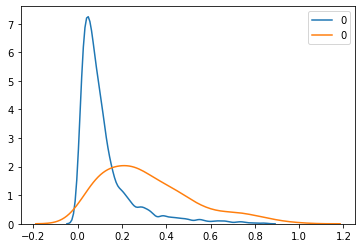

In [85]:
sns.kdeplot(prob0[0])  ##Probability dist of 0 predicted probabilities
sns.kdeplot(prob1[0])   ##Probability dist of 1 predicted probabilities
plt.show()

In [86]:
#The above chart shows the distribution of probability separately for target-(Churn 0) and target-(Churn 1)

In [87]:
##ROC Analysis

In [88]:
prob_plot.head()

,0,1
0,0.228493,0.0
1,0.243994,0.0
2,0.194098,0.0
3,0.263591,0.0
4,0.422278,1.0


In [89]:
logreg.fit(X_train,y_train)
y_prob_test = logreg.predict_proba(X_test)[:,1]
y_pred_test = logreg.predict(X_test)

y_prob_train = logreg.predict_proba(X_train)[:,1]
y_pred_train = logreg.predict(X_train)


print(metrics.confusion_matrix(y_train,y_pred_train))
print(metrics.accuracy_score(y_train,y_pred_train))

print(metrics.confusion_matrix(y_test,y_pred_test))
print(metrics.accuracy_score(y_test,y_pred_test))

[[1934   54]
 [ 286   59]]
0.8542648949849978
[[845  17]
 [112  26]]
0.871


In [90]:
from sklearn.metrics import roc_auc_score, roc_curve

In [91]:
a = roc_auc_score(y_train,y_prob_train) ##AUC of train

In [92]:
b= roc_auc_score(y_test,y_prob_test) ##AUC of test

In [93]:
fpr, tpr, thresholds = roc_curve(y_train,y_prob_train)  ##Returns array of FPR, TPR, thresholds

In [94]:
fpr1, tpr1, thresholds1 = roc_curve(y_test,y_prob_test)

0.8214810602746916 AUC train


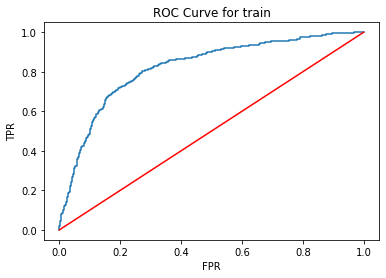

In [95]:
print(a,'AUC train')
plt.plot(fpr,tpr)   ##For train
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for train')
plt.show()

0.8124684757389288 AUC test


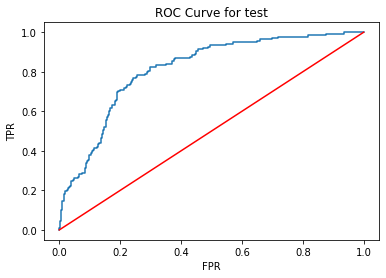

In [96]:
print(b,'AUC test')
plt.plot(fpr1,tpr1)   ##For test
plt.plot(fpr1,fpr1,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for test')
plt.show()

In [97]:
thresholds[thresholds>1] = 1

In [98]:
thresholds

array([1.        , 0.98190967, 0.85161203, 0.83959357, 0.80626914,
       0.79285689, 0.78305282, 0.77103636, 0.76919736, 0.7526999 ,
       0.75008044, 0.74181629, 0.73095026, 0.71764081, 0.69987689,
       0.69857442, 0.69522489, 0.69175247, 0.68028317, 0.66541317,
       0.6623002 , 0.65362463, 0.65091253, 0.64270805, 0.64218288,
       0.64196438, 0.63175992, 0.62502074, 0.62121597, 0.61190136,
       0.59608729, 0.57847736, 0.57789655, 0.57698365, 0.56913781,
       0.55355934, 0.54942232, 0.54780648, 0.54735621, 0.54449575,
       0.54397057, 0.53887903, 0.53661666, 0.53577417, 0.52284647,
       0.5182867 , 0.51743784, 0.51695473, 0.51087941, 0.504454  ,
       0.49951267, 0.49777396, 0.4972735 , 0.49706872, 0.48948163,
       0.47789898, 0.4760034 , 0.46832387, 0.46508359, 0.46006226,
       0.45495383, 0.45391068, 0.45256074, 0.45234164, 0.450308  ,
       0.44993097, 0.44793068, 0.44767589, 0.44349283, 0.43910895,
       0.4349188 , 0.43459397, 0.43311068, 0.43257223, 0.43177

0.8214810602746916 AUC train


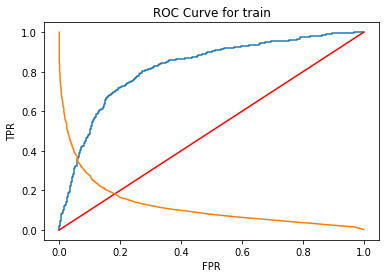

In [99]:
print(a,'AUC train')
plt.plot(fpr,tpr)   ##For train
plt.plot(fpr,fpr,'r-')
plt.plot(fpr,thresholds)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for train')
plt.show()

0.8214810602746916 AUC train


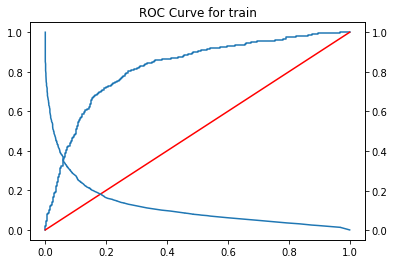

In [100]:
print(a,'AUC train')


fig,ax = plt.subplots()

ax.plot(fpr,tpr)   ##For train
ax.plot(fpr,fpr,'r-')
ax1 = ax.twinx()
ax1.plot(fpr,thresholds)
#plt.xlabel('FPR')
#plt.ylabel('TPR')
plt.title('ROC Curve for train')
plt.show()

In [101]:
##Above we saw the AUC and ROC evaluation for our logistic regression models:

In [102]:
#Now, let's try other methods for classification

In [103]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [104]:
df.dtypes

Churn               object
AccountWeeks         int64
ContractRenewal     object
DataPlan            object
DataUsage          float64
CustServCalls       object
DayMins            float64
DayCalls             int64
MonthlyCharge      float64
OverageFee         float64
RoamMins           float64
dtype: object

# DECISION TREE

In [105]:
X = df.drop('Churn',axis=1)
y = df['Churn']
y=y.astype('int')

In [106]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
dt = DecisionTreeClassifier()

In [109]:
dt.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [110]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [111]:
features = X.columns
dot_data = export_graphviz(dt,out_file=None,feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [112]:
#Hyperparameter tuning in Machine Learning

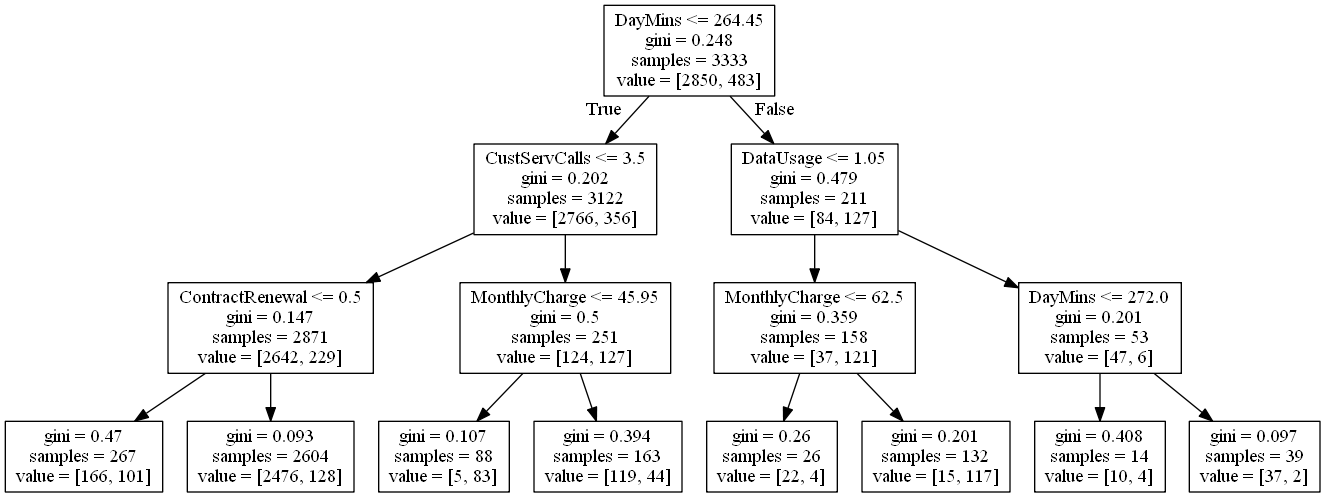

In [113]:
dt = DecisionTreeClassifier(max_depth=3,min_samples_leaf=11)
dt.fit(X,y)
features = X.columns
dot_data = export_graphviz(dt,out_file=None,feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [114]:
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)
y_pred_train = dt.predict(X_train)
y_prob_train = dt.predict_proba(X_train)

In [115]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

In [116]:
print('Accuracy of Decision Tree on Test',accuracy_score(y_pred,y_test))
print('Accuracy of Decision Tree on Train',accuracy_score(y_pred_train,y_pred_train))

Accuracy of Decision Tree on Test 0.905
Accuracy of Decision Tree on Train 1.0


#Hyperparameter Tuning--Grid Search

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [118]:
dt = DecisionTreeClassifier()
params  = {'max_depth' : [2,3,4,5,6,7,8],
    'min_samples_split':[2,3,4,5,6,7,8,9,10],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]}

gsearch = GridSearchCV(dt,param_grid=params,cv=3)

gsearch.fit(X,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10

In [119]:
gsearch.best_params_

{'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 2}

In [120]:
##For Grid search we consider max_depth between 2 to 8, minimum samples split between 2 to 10
#and min samples leaf between 1 to 10, and we obatined the perfect combination above.

In [121]:
##No we will build decision tree using these hyperparameters

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.3)

In [124]:
#dt = DecisionTreeClassifier(max_depth= 2, min_samples_leaf=5, min_samples_split= 2)
dt = DecisionTreeClassifier(**gsearch.best_params_)

dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [125]:
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]
y_pred_train = dt.predict(X_train)
y_prob_train = dt.predict_proba(X_train)[:,1]

In [126]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

In [127]:
print('Accuracy of Decision Tree on Test',accuracy_score(y_pred,y_test))
print('Accuracy of Decision Tree on Train',accuracy_score(y_pred_train,y_train))

Accuracy of Decision Tree on Test 0.917
Accuracy of Decision Tree on Train 0.9339905700814402


In [128]:
print('ROC AUC test',roc_auc_score(y_test,y_prob))
print('ROC AUC train',roc_auc_score(y_train,y_prob_train))

ROC AUC test 0.8240613026819924
ROC AUC train 0.8992673992673993


# Hyperparamter tuning--Random Search

In [129]:
from scipy.stats import randint as sp_randint

dt = DecisionTreeClassifier(random_state=1)

params  = {'max_depth' : sp_randint(2,10),
    'min_samples_split':sp_randint(2,50),
    'min_samples_leaf':sp_randint(1,20),'criterion':['gini','entropy']}

rand_search = RandomizedSearchCV(dt,param_distributions=params,cv=3,random_state=1)

rand_search.fit(X,y)


print(rand_search.best_params_)

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 14, 'min_samples_split': 8}


In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.3)

In [132]:
#{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 14, 'min_samples_split': 8}
dt = DecisionTreeClassifier(**rand_search.best_params_)

dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=14, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [133]:
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]
y_pred_train = dt.predict(X_train)
y_prob_train = dt.predict_proba(X_train)[:,1]

In [134]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

In [135]:
print('Accuracy of Decision Tree on Test',accuracy_score(y_pred,y_test))
print('Accuracy of Decision Tree on Train',accuracy_score(y_pred_train,y_train))

Accuracy of Decision Tree on Test 0.904
Accuracy of Decision Tree on Train 0.9374196313759109


In [136]:
print('ROC AUC test',roc_auc_score(y_test,y_prob))
print('ROC AUC train',roc_auc_score(y_train,y_prob_train))

ROC AUC test 0.8657108287961283
ROC AUC train 0.9545216591775297


In [137]:
#Bootstrap will sample the data as well as the features, so as to create different types(different
#features) of trees, to compare the best possible model

In [138]:
#combining the result by voting(answer common to majority of trees)

In [139]:
#Bootstrap-aggregation---the whole process is called bagging
##Random forest is just one example of bagging

In [140]:
##In a population, if a sample is predicting well(area which are not being predicted well--we will
#increase the weight there, and check the change in the predictions)

# Random Forest

In [141]:
#Random forest builds multiple decision trees and merges them together to get a more accurate and
#stable prediction

# ##Random Forest Classifier

In [142]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10,random_state=1)



In [143]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [144]:
y_pred = rfc.predict(X_test)
y_prob = rfc.predict_proba(X_test)[:,1]
y_pred_train = rfc.predict(X_train)
y_prob_train = rfc.predict_proba(X_train)[:,1]

In [145]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

In [146]:
print('Accuracy of Decision Tree on Test',accuracy_score(y_pred,y_test))
print('Accuracy of Decision Tree on Train',accuracy_score(y_pred_train,y_train))

Accuracy of Decision Tree on Test 0.928
Accuracy of Decision Tree on Train 0.992284612087441


In [147]:
print('ROC AUC test',roc_auc_score(y_test,y_prob))
print('ROC AUC train',roc_auc_score(y_train,y_prob_train))

ROC AUC test 0.8683605565638233
ROC AUC train 0.9999377141077546


In [148]:
##we noticed that there is large difference between model performance of train and test, hence
# we will tune the hyper parameter and check the results

In [149]:
X.shape[1]

10

# Hyper parameter tuning of Random Forest

In [150]:
from scipy.stats import randint as sp_randint

rfc= RandomForestClassifier(random_state=1)

params = {'n_estimators':sp_randint(5,25),'criterion':['gini','entropy'],
    'max_depth':sp_randint(2,10),
    'min_samples_split':sp_randint(2,20),
    'min_samples_leaf':sp_randint(1,20),'max_features':sp_randint(2,10)}

rand_search = RandomizedSearchCV(rfc,param_distributions=params,cv=3,random_state=1)

rand_search.fit(X,y)

print(rand_search.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 22}


In [151]:
#{'criterion': 'gini', 'max_depth': 7, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 22}
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.3)

rfc = RandomForestClassifier(**rand_search.best_params_)

rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)
y_prob = rfc.predict_proba(X_test)[:,1]
y_pred_train = rfc.predict(X_train)
y_prob_train = rfc.predict_proba(X_train)[:,1]

from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

print('Accuracy of Decision Tree on Test',accuracy_score(y_pred,y_test))
print('Accuracy of Decision Tree on Train',accuracy_score(y_pred_train,y_train))

print('ROC AUC test',roc_auc_score(y_test,y_prob))
print('ROC AUC train',roc_auc_score(y_train,y_prob_train))

Accuracy of Decision Tree on Test 0.93
Accuracy of Decision Tree on Train 0.9541363051864552
ROC AUC test 0.8959951603145795
ROC AUC train 0.9658406370956978


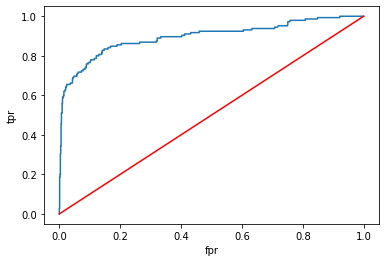

ROC AUC test 0.8959951603145795


In [152]:
fpr,tpr,thresholds = roc_curve(y_test,y_prob)

plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()
print('ROC AUC test',roc_auc_score(y_test,y_prob))

# KNN

In [153]:
#K nearest neighbours

# k-NN Classifier

In [154]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [155]:
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:,1]
y_pred_train = knn.predict(X_train)
y_prob_train = knn.predict_proba(X_train)[:,1]

from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

print('Accuracy of KNN on Test',accuracy_score(y_pred,y_test))
print('Accuracy of KNN on Train',accuracy_score(y_pred_train,y_train))

print('ROC AUC test',roc_auc_score(y_test,y_prob))
print('ROC AUC train',roc_auc_score(y_train,y_prob_train))

Accuracy of KNN on Test 0.867
Accuracy of KNN on Train 0.8936990998714102
ROC AUC test 0.6678483565234927
ROC AUC train 0.8919421334401091


In [156]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

params = {'n_neighbors':sp_randint(1,25),
    'p':sp_randint(1,5)}

rand_search = RandomizedSearchCV(knn,param_distributions=params,cv=3,random_state=1)

rand_search.fit(X,y)

print(rand_search.best_params_)


##n_neighbors is k and p is the distance(p=1 means Manhattan dist.)

{'n_neighbors': 13, 'p': 1}


In [157]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.3)

knn = KNeighborsClassifier(**rand_search.best_params_)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:,1]
y_pred_train = knn.predict(X_train)
y_prob_train = knn.predict_proba(X_train)[:,1]

from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

print('Accuracy of Decision Tree on Test',accuracy_score(y_pred,y_test))
print('Accuracy of Decision Tree on Train',accuracy_score(y_pred_train,y_train))

print('ROC AUC test',roc_auc_score(y_test,y_prob))
print('ROC AUC train',roc_auc_score(y_train,y_prob_train))

Accuracy of Decision Tree on Test 0.881
Accuracy of Decision Tree on Train 0.8876982426060865
ROC AUC test 0.7199637023593466
ROC AUC train 0.8414445878008632


In [158]:
## Hyperparameter tuning using sp_randint

In [159]:
from scipy.stats import randint as sp_randint

rfc= RandomForestClassifier(random_state=1)

params = {'n_estimators':sp_randint(5,25),'criterion':['gini','entropy'],
    'max_depth':sp_randint(2,10),
    'min_samples_split':sp_randint(2,20),
    'min_samples_leaf':sp_randint(1,20),'max_features':sp_randint(2,10)}

rand_search_rfc = RandomizedSearchCV(rfc,param_distributions=params,cv=3,random_state=1)

rand_search_rfc.fit(X,y)

print(rand_search_rfc.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 22}


In [160]:
#{'criterion': 'gini', 'max_depth': 7, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 22}
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.3)

rfc = RandomForestClassifier(**rand_search_rfc.best_params_)

rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)
y_prob = rfc.predict_proba(X_test)[:,1]
y_pred_train = rfc.predict(X_train)
y_prob_train = rfc.predict_proba(X_train)[:,1]

from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

print('Accuracy of Decision Tree on Test',accuracy_score(y_pred,y_test))
print('Accuracy of Decision Tree on Train',accuracy_score(y_pred_train,y_train))

print('ROC AUC test',roc_auc_score(y_test,y_prob))
print('ROC AUC train',roc_auc_score(y_train,y_prob_train))

Accuracy of Decision Tree on Test 0.931
Accuracy of Decision Tree on Train 0.9601371624517788
ROC AUC test 0.8809397055858035
ROC AUC train 0.9662758968426984


In [161]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

params = {'n_neighbors':sp_randint(1,25),
    'p':sp_randint(1,5)}

rand_search_knn = RandomizedSearchCV(knn,param_distributions=params,cv=3,random_state=1)

rand_search_knn.fit(X,y)

print(rand_search_knn.best_params_)


##n_neighbors is k and p is the distance(p=1 means Manhattan dist.)

{'n_neighbors': 13, 'p': 1}


In [162]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.3)

knn = KNeighborsClassifier(**rand_search_knn.best_params_)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:,1]
y_pred_train = knn.predict(X_train)
y_prob_train = knn.predict_proba(X_train)[:,1]

from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

print('Accuracy of Decision Tree on Test',accuracy_score(y_pred,y_test))
print('Accuracy of Decision Tree on Train',accuracy_score(y_pred_train,y_train))

print('ROC AUC test',roc_auc_score(y_test,y_prob))
print('ROC AUC train',roc_auc_score(y_train,y_prob_train))

Accuracy of Decision Tree on Test 0.881
Accuracy of Decision Tree on Train 0.8876982426060865
ROC AUC test 0.7199637023593466
ROC AUC train 0.8414445878008632


# Stacking algorithms

In [163]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

In [164]:
lr = LogisticRegression()
rfc = RandomForestClassifier(**rand_search_rfc.best_params_)
knn = KNeighborsClassifier(**rand_search_knn.best_params_)


In [165]:
clf = VotingClassifier(estimators=[('lr',lr),('rfc',rfc),('knn',knn)],voting='soft')
clf.fit(X_train,y_train)


y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:,1]
y_pred_train = clf.predict(X_train)
y_prob_train = clf.predict_proba(X_train)[:,1]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [166]:
print('Accuracy of Stacked Algorithms on Test',accuracy_score(y_pred,y_test))
print('Accuracy of Stacked Algorithms on Train',accuracy_score(y_pred_train,y_train))

Accuracy of Stacked Algorithms on Test 0.886
Accuracy of Stacked Algorithms on Train 0.904414916416631


In [167]:
print('ROC AUC test-Stacked Algo',roc_auc_score(y_test,y_prob))
print('ROC AUC train-Stacked Algo',roc_auc_score(y_train,y_prob_train))

ROC AUC test-Stacked Algo 0.8869368824359749
ROC AUC train-Stacked Algo 0.941208049710074


In [168]:
##Changing Weights

clf = VotingClassifier(estimators=[('lr',lr),('rfc',rfc),('knn',knn)],voting='soft',weights=[2,3,1])
clf.fit(X_train,y_train)


y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:,1]
y_pred_train = clf.predict(X_train)
y_prob_train = clf.predict_proba(X_train)[:,1]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [169]:
print('Accuracy of Stacked Algorithms on Test after changing weights',accuracy_score(y_pred,y_test))
print('Accuracy of Stacked Algorithms on Train after changing weights',accuracy_score(y_pred_train,y_train))

Accuracy of Stacked Algorithms on Test after changing weights 0.911
Accuracy of Stacked Algorithms on Train after changing weights 0.9348478354050579


In [170]:
print('ROC AUC test-Stacked Algo after changing weights',roc_auc_score(y_test,y_prob))
print('ROC AUC train-Stacked Algo after changing weights',roc_auc_score(y_train,y_prob_train))

ROC AUC test-Stacked Algo after changing weights 0.8920508166969147
ROC AUC train-Stacked Algo after changing weights 0.947871157182898


In [171]:
##Optimal weights for each algo can be found using linear programming

# LGBM Classifier

In [172]:
import lightgbm as lgb
lgbc = lgb.LGBMClassifier()

In [173]:
X1 = X.astype(float)
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=1)

In [174]:
lgbc.fit(X_train,y_train)

y_pred = lgbc.predict(X_test)
y_prob = lgbc.predict_proba(X_test)[:,1]

In [175]:
from sklearn.metrics  import accuracy_score, roc_auc_score,roc_curve

In [176]:
print('Accuracy on test',accuracy_score(y_test,y_pred))
print('AUC on test',roc_auc_score(y_test,y_prob))

Accuracy on test 0.926
AUC on test 0.8837830207703166


In [177]:
cols = X.columns
lgbc.feature_importances_

fi = pd.DataFrame(index=cols,data=lgbc.feature_importances_,columns=['Importance'])
fi

,Importance
AccountWeeks,342
ContractRenewal,57
DataPlan,24
DataUsage,150
CustServCalls,143
DayMins,510
DayCalls,367
MonthlyCharge,398
OverageFee,535
RoamMins,474


In [178]:
#Feature importance is available for bagging and boosting both

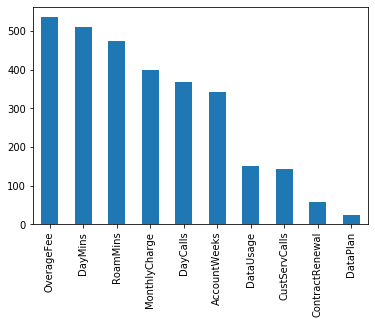

In [179]:
fi['Importance'].sort_values(ascending=False).plot.bar()

In [180]:
#hyperparameter tuning of LGBM

In [181]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

lgbc= lgb.LGBMClassifier(random_state=1)

params = {'n_estimators':sp_randint(5,250),
    'max_depth':sp_randint(2,20),
    'min_child_samples':sp_randint(1,20),'num_leaves':sp_randint(5,50)}

rand_search_lgbc = RandomizedSearchCV(lgbc,param_distributions=params,cv=3,random_state=1)

rand_search_lgbc.fit(X1,y)

print(rand_search_lgbc.best_params_)

{'max_depth': 3, 'min_child_samples': 1, 'n_estimators': 65, 'num_leaves': 22}


In [182]:


lgbc= lgb.LGBMClassifier(**rand_search_lgbc.best_params_,random_state=1)

lgbc.fit(X_train,y_train)

y_pred = lgbc.predict(X_test)
y_prob = lgbc.predict_proba(X_test)[:,1]
y_pred_train = lgbc.predict(X_train)
y_prob_train = lgbc.predict_proba(X_train)[:,1]

from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

print('Accuracy of Decision Tree on Test',accuracy_score(y_pred,y_test))
print('Accuracy of Decision Tree on Train',accuracy_score(y_pred_train,y_train))

print('ROC AUC test',roc_auc_score(y_test,y_prob))
print('ROC AUC train',roc_auc_score(y_train,y_prob_train))

Accuracy of Decision Tree on Test 0.927
Accuracy of Decision Tree on Train 0.9537076725246464
ROC AUC test 0.8829159104658197
ROC AUC train 0.9606909285046936


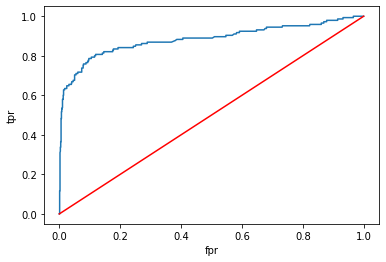

In [183]:
fpr,tpr,thresholds = roc_curve(y_test,y_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [184]:
##If data is imbalance, we can use SMOTE:

In [224]:
from imblearn.over_sampling import SMOTE

In [187]:
def model_compare(algo,xtrain,xtest,ytrain,ytest):
    algo.fit(xtrain,ytrain)
    ypred_train = algo.predict(xtrain)
    ypred_test = algo.predict(xtest)
    
    yprob_train = algo.predict_proba(xtrain)[:,1]
    yprob_test = algo.predict_proba(xtest)[:,1]
    
    print('Accuracy on Train Set',accuracy_score(ytrain,ypred_train))
    print('Accuracy on Test Set',accuracy_score(ytest,ypred_test))
    
    print('AUC ROC on Train Set',roc_auc_score(ytrain,yprob_train))
    print('AUC ROC on Test Set',roc_auc_score(ytest,yprob_test))
    
    
    fpr,tpr,thresholds = roc_curve(ytest,yprob_test)
    plt.plot(fpr,tpr)
    plt.plot(fpr,fpr,'r-')
    plt.show()
    

Accuracy on Train Set 0.9373433583959899
Accuracy on Test Set 0.895
AUC ROC on Train Set 0.9854375286587396
AUC ROC on Test Set 0.8893244605767292


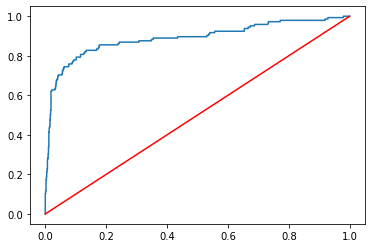

In [188]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')

X_train_sm, y_train_sm =  smote.fit_sample(X_train,y_train)

model_compare(rfc,X_train_sm,X_test,y_train_sm,y_test)

In [206]:
##Model compare with y also as input

def model_compare(algo,xtrain,xtest,ytrain,ytest,y):
    algo.fit(xtrain,ytrain)
    ypred_train = algo.predict(xtrain)
    ypred_test = algo.predict(xtest)
    ypred_test = pd.Series(ypred_test)
    yprob_train = algo.predict_proba(xtrain)[:,1]
    yprob_test = algo.predict_proba(xtest)[:,1]
    
    print('Accuracy on Train Set',accuracy_score(ytrain,ypred_train))
    print('Accuracy on Test Set',accuracy_score(ytest,ypred_test))
    
    print('AUC ROC on Train Set',roc_auc_score(ytrain,yprob_train))
    print('AUC ROC on Test Set',roc_auc_score(ytest,yprob_test))
    print(ypred_test.value_counts())
    print(confusion_matrix(ytest,ypred_test))
    print(classification_report(ytest,ypred_test))
    
    fpr,tpr,thresholds = roc_curve(ytest,yprob_test)
    plt.plot(fpr,tpr)
    plt.plot(fpr,fpr,'r-')
    plt.show()
    



Accuracy on Train Set 0.9406015037593985
Accuracy on Test Set 0.894
AUC ROC on Train Set 0.9853146651088874
AUC ROC on Test Set 0.8833313167977416
0    827
1    173
dtype: int64
[[788  67]
 [ 39 106]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       855
           1       0.61      0.73      0.67       145

    accuracy                           0.89      1000
   macro avg       0.78      0.83      0.80      1000
weighted avg       0.90      0.89      0.90      1000



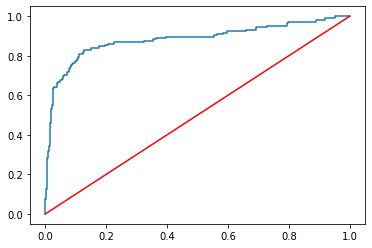

In [209]:
model_compare(rfc,X_train_sm,X_test,y_train_sm,y_test,y)

# Support Vector Machines

In [61]:
from sklearn.svm import SVC
svc = SVC(gamma='auto',probability=True)

svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)
y_prob = svc.predict_proba(X_test)[:,1]
y_pred_train = svc.predict(X_train)
y_prob_train = svc.predict_proba(X_train)[:,1]

from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

print('Accuracy of Decision Tree on Test',accuracy_score(y_pred,y_test))
print('Accuracy of Decision Tree on Train',accuracy_score(y_pred_train,y_train))

print('ROC AUC test',roc_auc_score(y_test,y_prob))
print('ROC AUC train',roc_auc_score(y_train,y_prob_train))

Accuracy of Decision Tree on Test 0.6320346320346321
Accuracy of Decision Tree on Train 1.0
ROC AUC test 0.2807413376309428
ROC AUC train 0.0


In [62]:
##Hyperparameter tuning SVM

In [63]:
from sklearn.model_selection import RandomizedSearchCV
svc = SVC(probability=True)

params = {'C':np.logspace(-4,4,10000),'gamma':np.logspace(-4,4,10000)}

rand_search_svc  = RandomizedSearchCV(svc, param_distributions=params, cv=3, random_state=1)


rand_search_svc.fit(X,y)
print(rand_search_svc.best_params_)

{'gamma': 0.0001857064049598135, 'C': 90.82299508072703}


In [64]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.3)

svc = SVC(**rand_search_svc.best_params_,probability=True)

svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)
y_prob = svc.predict_proba(X_test)[:,1]
y_pred_train = svc.predict(X_train)
y_prob_train = svc.predict_proba(X_train)[:,1]

from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

print('Accuracy of Decision Tree on Test',accuracy_score(y_pred,y_test))
print('Accuracy of Decision Tree on Train',accuracy_score(y_pred_train,y_train))

print('ROC AUC test',roc_auc_score(y_test,y_prob))
print('ROC AUC train',roc_auc_score(y_train,y_prob_train))

Accuracy of Decision Tree on Test 0.7359307359307359
Accuracy of Decision Tree on Train 0.88268156424581
ROC AUC test 0.7695809830781628
ROC AUC train 0.9207341545491031
